In [5]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
url = 'Cartwheeldata-Copy1.csv'
df = pd.read_csv(url)
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


In [13]:
print(df.columns, df.dtypes)

Index(['ID', 'Age', 'Gender', 'GenderGroup', 'Glasses', 'GlassesGroup',
       'Height', 'Wingspan', 'CWDistance', 'Complete', 'CompleteGroup',
       'Score'],
      dtype='object') ID                 int64
Age                int64
Gender            object
GenderGroup        int64
Glasses           object
GlassesGroup       int64
Height           float64
Wingspan         float64
CWDistance         int64
Complete          object
CompleteGroup      int64
Score              int64
dtype: object


In [54]:
cols = [col for col in df.columns]
ncols = []
dtypes = df.dtypes
print(cols, dtypes, "\n\n")
# print(dtypes['Gender'])
l = len(dtypes)
for i in range(1,l): # '0' positioned attribute -- ID (doesn't require)
    dt = dtypes[cols[i]]
    if(dt == "int64" or dt == "float64"):
        print(cols[i])
        ncols.append(cols[i])

['ID', 'Age', 'Gender', 'GenderGroup', 'Glasses', 'GlassesGroup', 'Height', 'Wingspan', 'CWDistance', 'Complete', 'CompleteGroup', 'Score'] ID                 int64
Age                int64
Gender            object
GenderGroup        int64
Glasses           object
GlassesGroup       int64
Height           float64
Wingspan         float64
CWDistance         int64
Complete          object
CompleteGroup      int64
Score              int64
dtype: object 


Age
GenderGroup
GlassesGroup
Height
Wingspan
CWDistance
CompleteGroup
Score


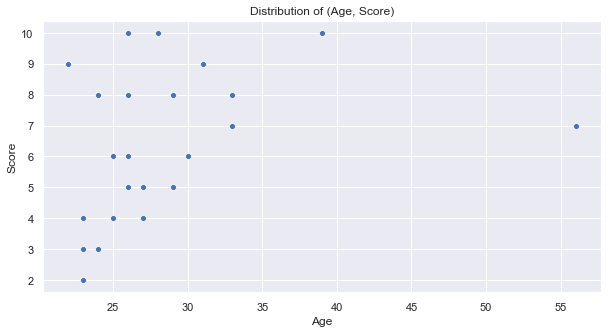

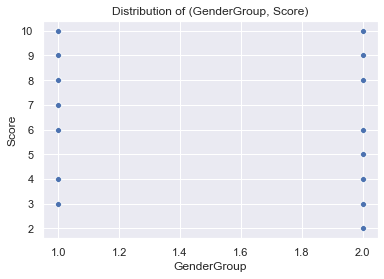

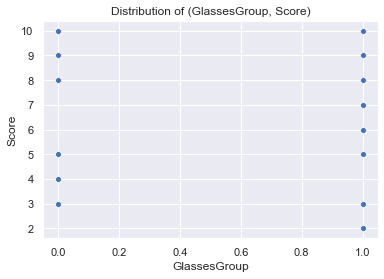

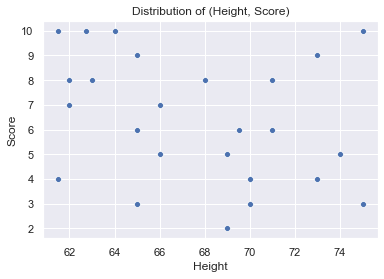

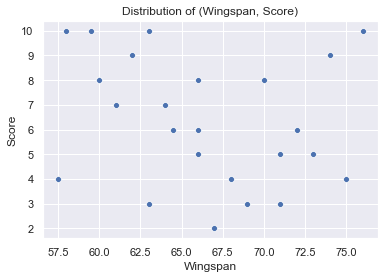

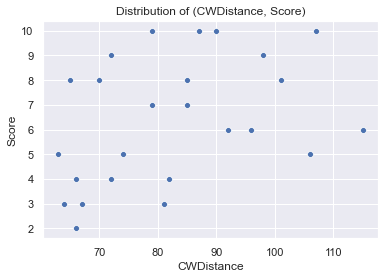

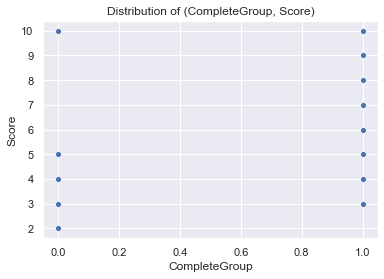

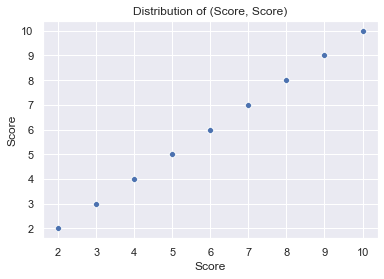

In [59]:
plt.figure(figsize=(10,5))
for x in ncols:
    sns.scatterplot(df[x], df['Score']).set(title='Distribution of (%s, Score)'%x)
    plt.show()

In [63]:
print(len(df['Age']) , len(df['Score']))

25 25


********* Simple Linear Regression, based on 'Age' feature-- dependent/target variable: 'Score' ***************

In [77]:
traintestsplit = np.random.rand(len(df)) < 0.8
print(traintestsplit)
train = df[traintestsplit] #traintestsplit works as a index --index range
test = df[~traintestsplit]
print(test)
print(test.loc[:, ['Age','Score']])

[ True  True  True  True  True False False  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True]
    ID  Age Gender  GenderGroup Glasses  GlassesGroup  Height  Wingspan  \
5    6   24      M            2       N             0    75.0      71.0   
6    7   28      M            2       N             0    75.0      76.0   
13  14   23      F            1       N             0    61.5      57.5   

    CWDistance Complete  CompleteGroup  Score  
5           81        N              0      3  
6          107        Y              1     10  
13          66        Y              1      4  
    Age  Score
5    24      3
6    28     10
13   23      4


In [110]:
train_x = train[['Age']]
train_y = train[['Score']]
test_x = test[['Age']]
test_y = test[['Score']]

In [111]:
# Here, we've got a moderate/weak relationship between Age and Score better than other pairs:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
print(train_x.shape, len(train_y))
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

(22, 1) 22
Coefficients:  [[0.10019837]]
Intercept:  [3.6261285]


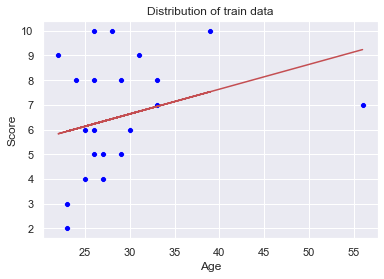

In [112]:
sns.scatterplot(train['Age'], train['Score'], color='blue').set(title="Distribution of train data")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.show()

In [117]:
test_x = np.asanyarray(test_x)
test_y = np.asanyarray(test_y)
test_yhat = regr.predict(test_x)
print("Actual y: ", test_y)
print("Predicted y: ",test_yhat)

print("Mean Absolute Error(MAE): %.2f" % np.mean(np.absolute(test_y - test_yhat)))
print("Mean Squared Error(MSE): %.2f" % np.mean( (test_y - test_yhat)**2 ))

from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_yhat, test_y))

Actual y:  [[ 3]
 [10]
 [ 4]]
Predicted y:  [[6.03088944]
 [6.43168293]
 [5.93069107]]
Mean Absolute Error(MAE): 2.84
Mean Squared Error(MSE): 8.55
R2-score: -181.47


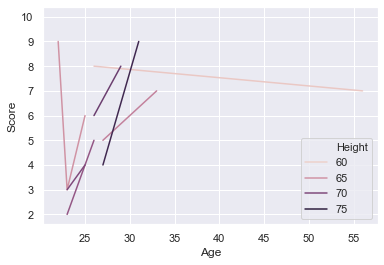

In [97]:
# Line plot using seaborn...
sns.lineplot(x = "Age", y="Score", data=train, hue='Height') # 'hue' is used for 'group by other variable'
plt.show()

######################## MUST => seaborn 'relational plot onto FacitGrid' => relplot(x = "x-axis-attribute", y="y-axis-attribute", col="other-attribute-for-column", row="other-attribute-for-row", sizes=(10, 100), kind="scatter/line", hue="group-by-attribute", data=dataset) ##############################

In [103]:
df.columns

Index(['ID', 'Age', 'Gender', 'GenderGroup', 'Glasses', 'GlassesGroup',
       'Height', 'Wingspan', 'CWDistance', 'Complete', 'CompleteGroup',
       'Score'],
      dtype='object')

<Figure size 1440x720 with 0 Axes>

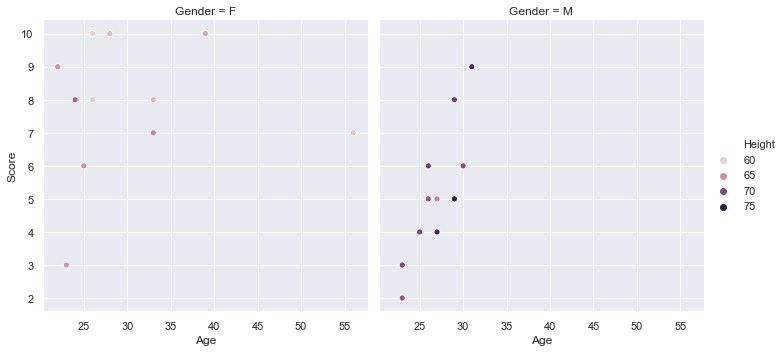

In [104]:
plt.figure(figsize=(20,10))
sns.relplot(x="Age", y="Score", col="Gender", sizes=(10,100), hue="Height", kind="scatter", data=train)
plt.show()

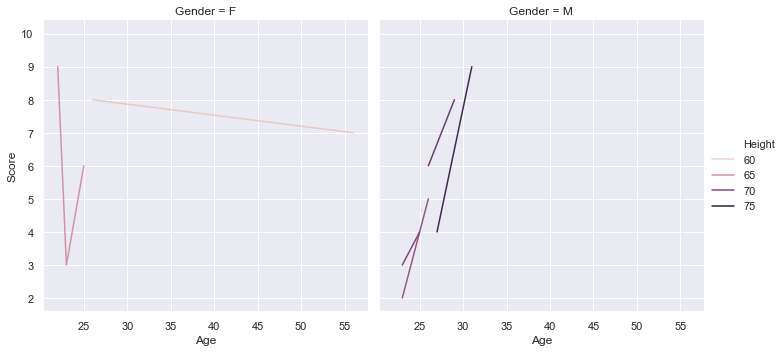

In [106]:
sns.relplot(x="Age", y="Score", kind="line", col="Gender", hue="Height",  data=train)
plt.show()

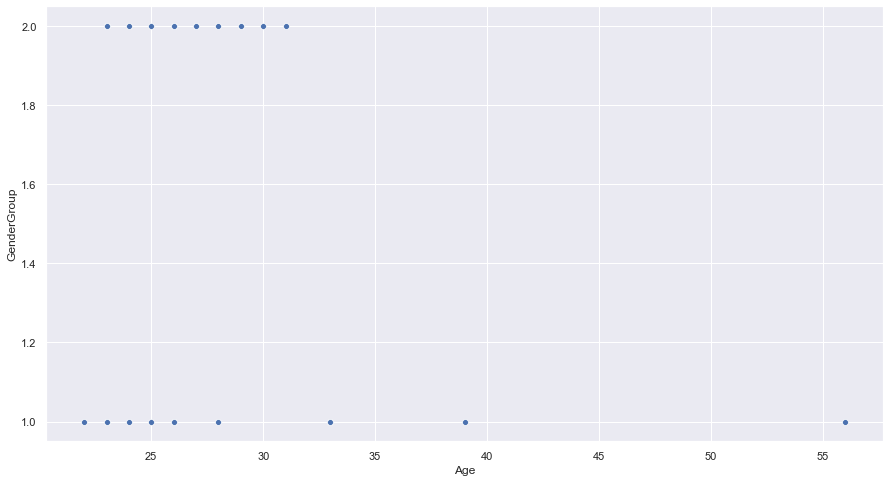

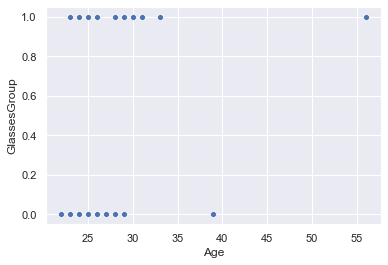

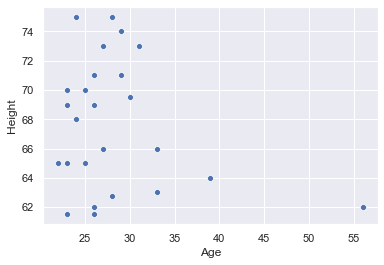

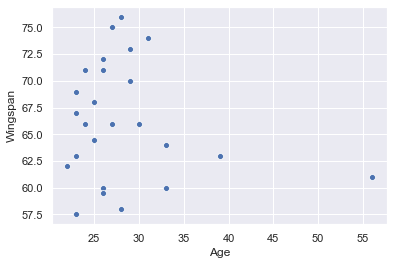

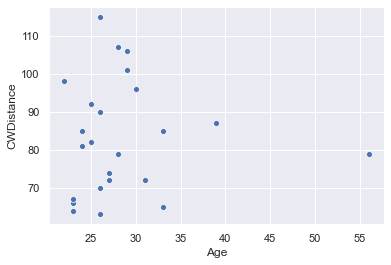

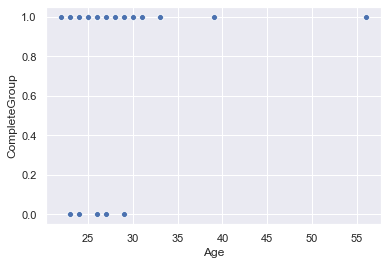

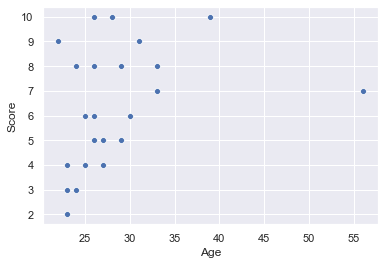

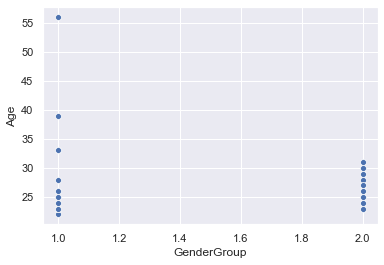

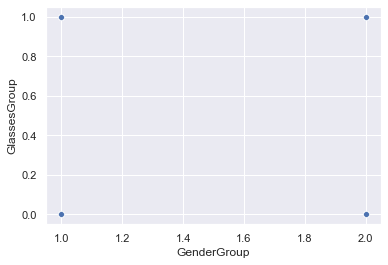

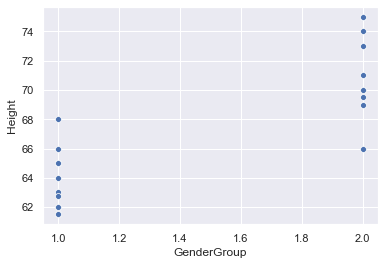

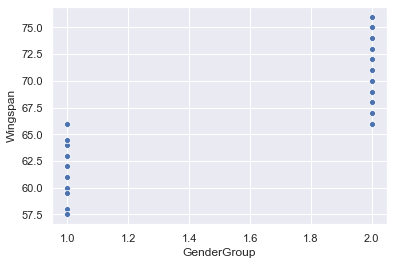

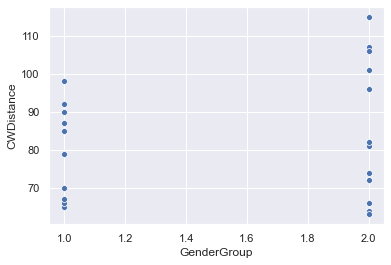

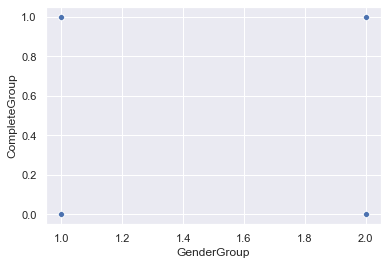

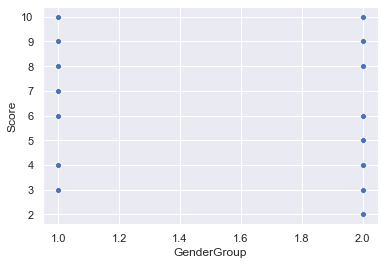

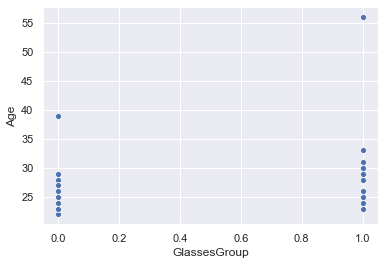

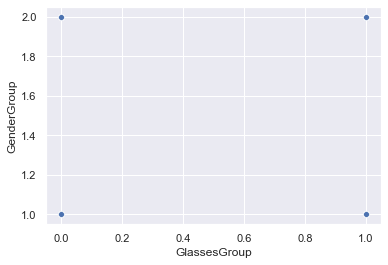

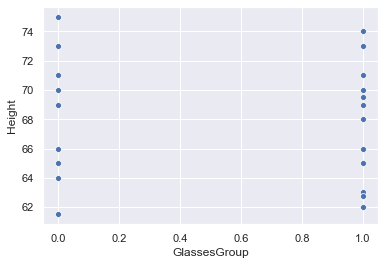

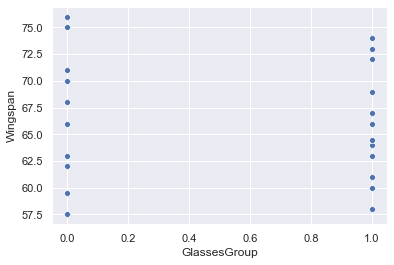

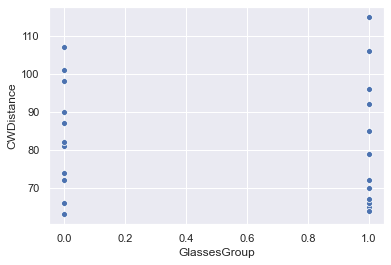

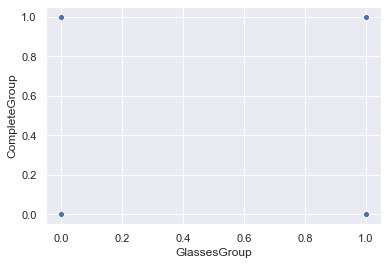

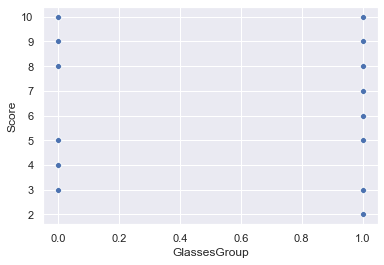

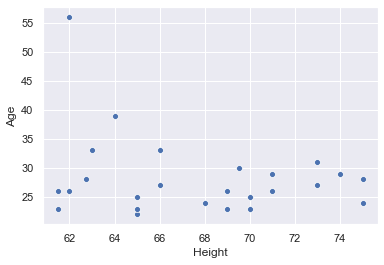

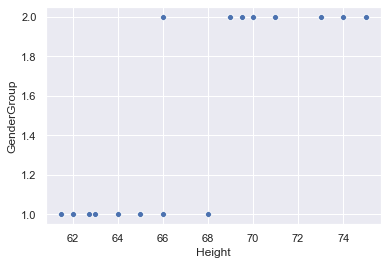

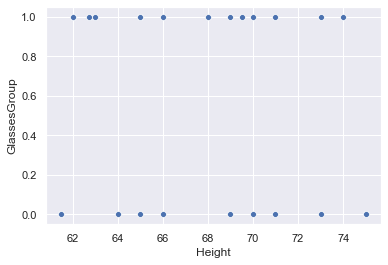

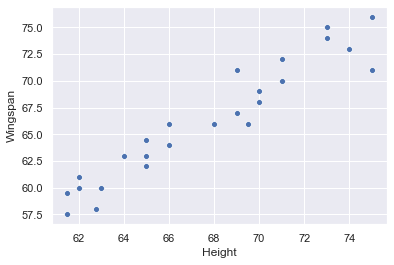

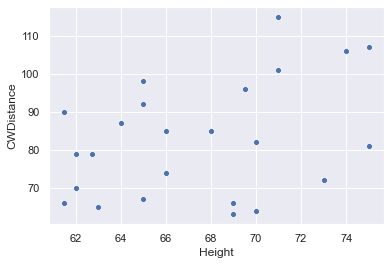

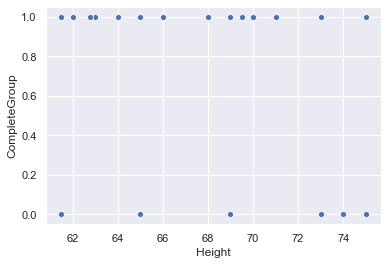

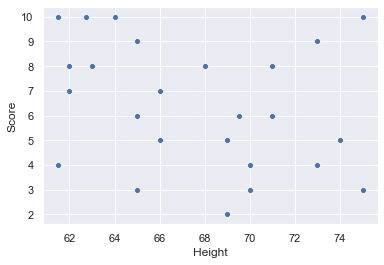

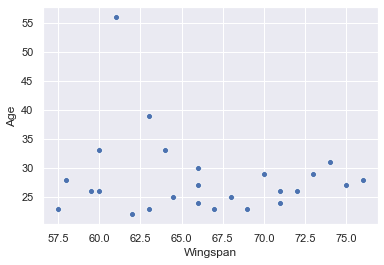

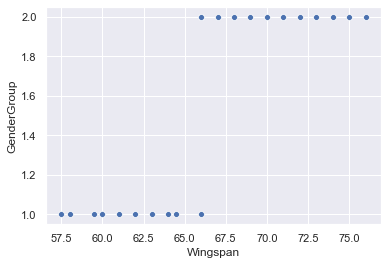

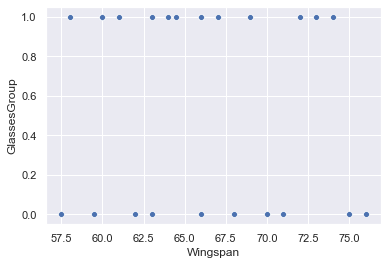

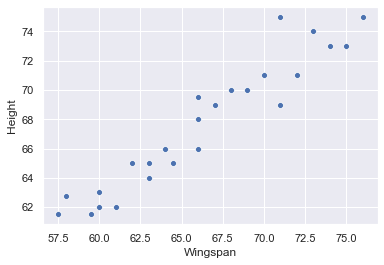

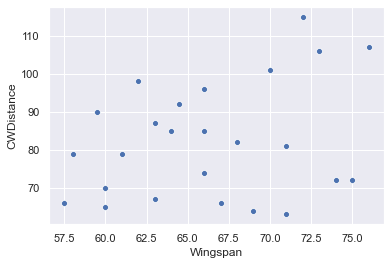

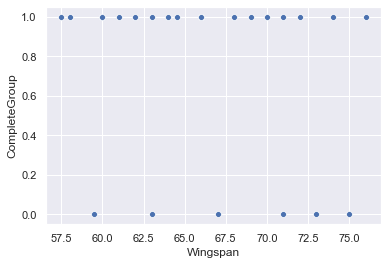

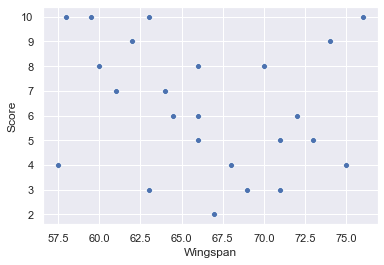

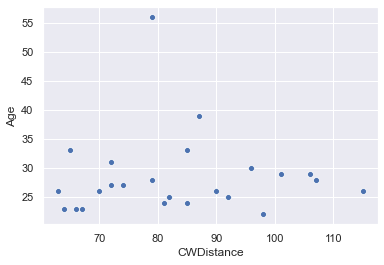

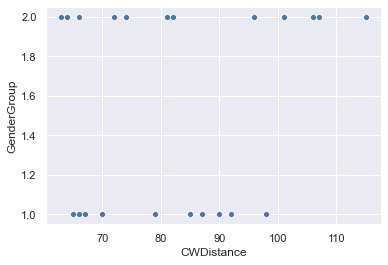

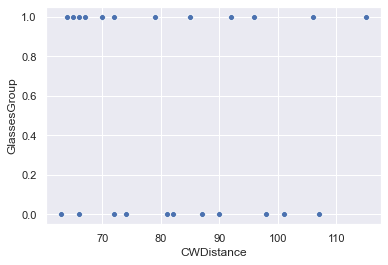

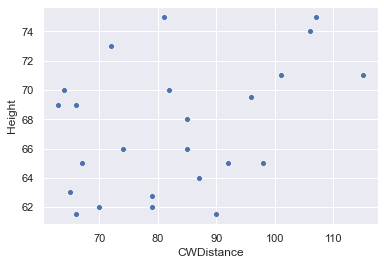

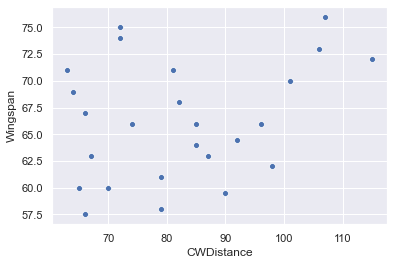

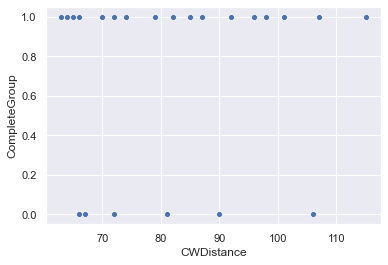

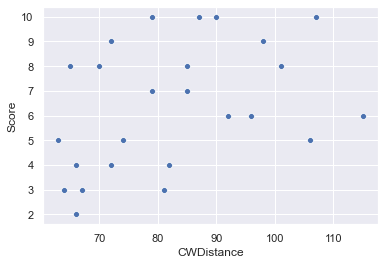

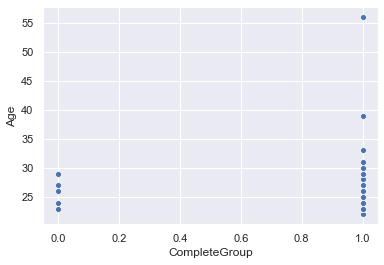

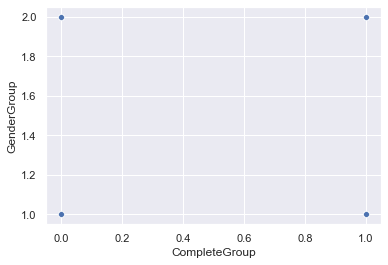

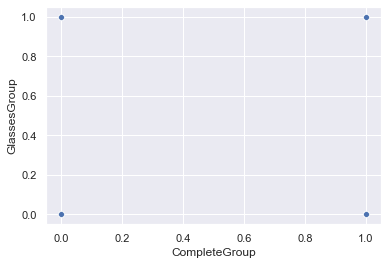

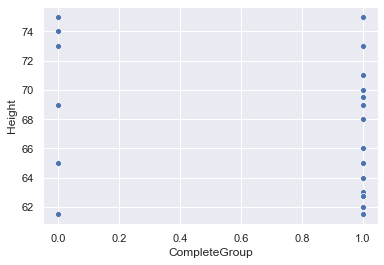

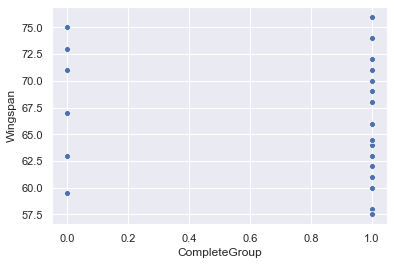

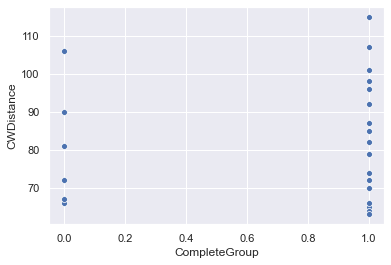

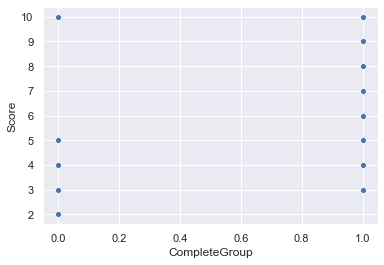

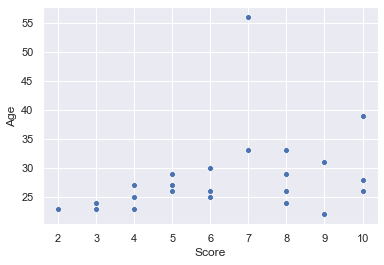

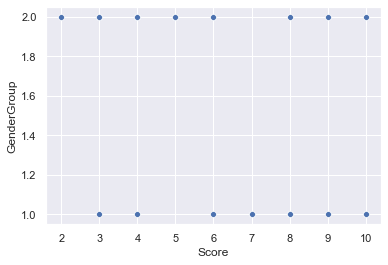

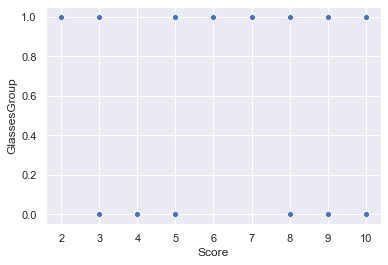

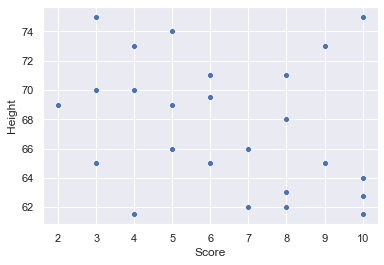

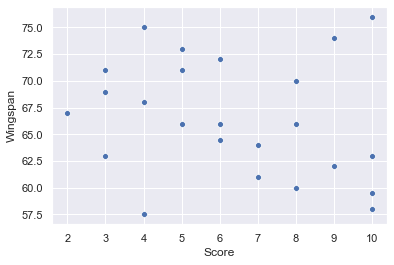

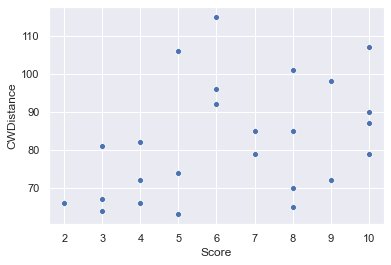

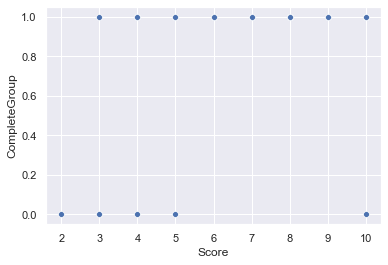

In [58]:
plt.figure(figsize=(15,8))
for x in ncols:
    for y in ncols:
        if x != y:
            sns.scatterplot(df[x], df[y])
            plt.show()